# Gradient Descent Optimisation

In this notebook we will be looking optimisation techniques that improve upon gradient descent which takes the following form: 

$$\theta_{n+1}=\theta-\eta \nabla_{\theta}\text{MSE}(\theta)$$

Where $\nabla_{\theta}\text{MSE}(\theta)$ is: 

$$\nabla_{\theta}\text{MSE}(\theta)=\frac 2 m X^T(X\theta-y)$$

## Momentum

To improve upon this algorithm momentum takes into account the weights from the previous iteration to remember the "momentum" of the descent: 

$$ \Delta \theta = \alpha \Delta \theta - \eta \nabla_{\theta}\text{MSE}(\theta)$$

$$ \theta = \theta + \Delta \theta$$

We implement it below using the gradient descent data: 

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [18]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

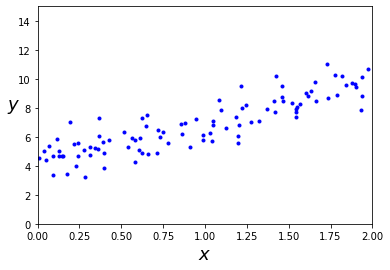

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
eta = 0.1 
alpha = 0.1
n_iterations = 1000 
m = 100
delta_theta = np.zeros((2,1))

X_b = np.c_[ np.ones(( 100, 1)), X] # add bias vector of 1s

thetas = np.random.randn(2,1) #random initialisation
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
    delta_theta = alpha * delta_theta - eta * gradients
    thetas += delta_theta
thetas

array([[4.21509616],
       [2.77011339]])

And we get almost the same as the line $y=4+3x$.

## AdaGrad

AdaGrad works by updating each parameter iteratively with a per-parameter learning rate however it still has the global learning rate $\eta$. AdaGrad depends on the matrix $G$ which is the outer-product matrix: 

$$G = \sum_{\tau=1}^{t} g_\tau g_\tau^T$$

Where $g_\tau$ is the gradient at iteration $\tau$. The formula for updating the weights then becomes:

$$\theta_{n+1} = \theta - \eta \text{Diag}(G)^{-\frac 1 2}\odot g$$

In [61]:
eta = 0.2
n_iterations = 10000 
m = 100
G = np.zeros((2,2))

X_b = np.c_[ np.ones(( 100, 1)), X] # add bias vector of 1s

thetas = np.random.randn(2,1) #random initialisation
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
    G += gradients.dot(gradients.transpose())
    thetas -= np.multiply(eta * np.power(G.diagonal().reshape((2,1)), -1/2), gradients)
thetas

array([[4.21500613],
       [2.7701933 ]])

## RMSprop

For RMSProp different learning rates are used for each parameter. The formula is as follows:

$$ v_{n+1} = \gamma v + (1-\gamma)(\nabla_{\theta}\text{MSE}(\theta))^2$$

$$ \theta_{n+1}=\theta-\frac{\eta}{\sqrt{v}}\nabla_{\theta}\text{MSE}(\theta)$$

In [30]:
eta = 0.001
n_iterations = 10000
m = 100
gamma = 0.1
v = np.zeros((2,1))

X_b = np.c_[ np.ones(( 100, 1)), X] # add bias vector of 1s

thetas = np.random.randn(2,1) #random initialisation
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
    v = gamma * v + (1-gamma) * np.power(gradients, 2)
    thetas -= eta/np.power(v, 1/2)*gradients
thetas

array([[4.21559616],
       [2.77061339]])

## Adam

Finally the most commonly used and arguably best optimiser is adam. Adam is similar to RMSprop but it also takes into account the second moments of the gradient which produces the following formulas:

$$m_{t+1} = \beta_1 m + (1-\beta_1) \nabla_{\theta}\text{MSE}(\theta)$$ 

$$v_{t+1} = \beta_2 v + (1-\beta_2) (\nabla_{\theta}\text{MSE}(\theta))^2$$

$$\hat m_{t+1} = \frac{m_{t+1}}{1-\beta_1}$$

$$\hat v_{t+1} = \frac{m_{t+1}}{1-\beta_2}$$

$$\theta = \theta - \frac{\eta \hat m_{t+1}}{\epsilon + \sqrt{\hat v_{t+1}}}$$

Where epsilon is a small value to prevent division by 0 and beta is the forgetting factor.

In [38]:
eta = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 10 ** -8
n_iterations = 1000
n = 100
m = np.zeros((2,1))
v = np.zeros((2,1))

X_b = np.c_[ np.ones(( 100, 1)), X] # add bias vector of 1s

thetas = np.random.randn(2,1) #random initialisation
for iteration in range(n_iterations):
    gradients = 2/n * X_b.T.dot(X_b.dot(thetas) - y)
    
    m = beta1 * m + (1-beta1) * gradients
    v = beta2 * v + (1-beta2) * np.power(gradients, 2)
    m_hat = m/(1-beta1)
    v_hat = m/(1-beta1)
    
    thetas -= eta*m_hat/(epsilon+np.power(v, 1/2))
thetas

array([[4.21509616],
       [2.77011339]])